In [3]:
import nltk
import urllib.request
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")


In [5]:
print(html)

b'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\n<head>\n\n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n\n  <title>PHP: Hypertext Preprocessor</title>\n\n <link rel="shortcut icon" href="https://www.php.net/favicon.ico">\n <link rel="search" type="application/opensearchdescription+xml" href="http://php.net/phpnetimprovedsearch.src" title="Add PHP.net search">\n <link rel="alternate" type="application/atom+xml" href="https://www.php.net/releases/feed.php" title="PHP Release feed">\n <link rel="alternate" type="application/atom+xml" href="https://www.php.net/feed.atom" title="PHP: Hypertext Preprocessor">\n\n <link rel="canonical" href="https://www.php.net/index.php">\n <link rel="shorturl" href="https://www.php.net/index">\n <link rel="alternate" href="https://www.php.net/index" hreflang="x-default">\n\n\n\n<link rel="stylesheet" type="text/css" href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" medi

In [6]:
print(soup.title)
print(soup.title.string)


<title>PHP: Hypertext Preprocessor</title>
PHP: Hypertext Preprocessor


In [8]:
text = soup.get_text()

tokens = re.findall('\w+', text)

In [9]:
tokens

['PHP',
 'Hypertext',
 'Preprocessor',
 'Downloads',
 'Documentation',
 'Get',
 'Involved',
 'Help',
 'Getting',
 'Started',
 'Introduction',
 'A',
 'simple',
 'tutorial',
 'Language',
 'Reference',
 'Basic',
 'syntax',
 'Types',
 'Variables',
 'Constants',
 'Expressions',
 'Operators',
 'Control',
 'Structures',
 'Functions',
 'Classes',
 'and',
 'Objects',
 'Namespaces',
 'Errors',
 'Exceptions',
 'Generators',
 'Attributes',
 'References',
 'Explained',
 'Predefined',
 'Variables',
 'Predefined',
 'Exceptions',
 'Predefined',
 'Interfaces',
 'and',
 'Classes',
 'Context',
 'options',
 'and',
 'parameters',
 'Supported',
 'Protocols',
 'and',
 'Wrappers',
 'Security',
 'Introduction',
 'General',
 'considerations',
 'Installed',
 'as',
 'CGI',
 'binary',
 'Installed',
 'as',
 'an',
 'Apache',
 'module',
 'Session',
 'Security',
 'Filesystem',
 'Security',
 'Database',
 'Security',
 'Error',
 'Reporting',
 'Using',
 'Register',
 'Globals',
 'User',
 'Submitted',
 'Data',
 'Magic',
 'Q

In [10]:
words = []
for word in tokens:
  words.append(word.lower())
words[:5]

['php', 'hypertext', 'preprocessor', 'downloads', 'documentation']

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [13]:
stopWords = nltk.corpus.stopwords.words('english')
stopWords[:5]

['i', 'me', 'my', 'myself', 'we']

In [14]:
print("Total including stopwords:", len(words))
clean_words = []
for w in words:
  if w not in stopWords:
    clean_words.append(w)
    
print("Length after stopwords:", len(clean_words) )
print("Total removed stopwords:", len(words)-len(clean_words) )
clean_words[:24]


Total including stopwords: 3427
Length after stopwords: 2257
Total removed stopwords: 1170


['php',
 'hypertext',
 'preprocessor',
 'downloads',
 'documentation',
 'get',
 'involved',
 'help',
 'getting',
 'started',
 'introduction',
 'simple',
 'tutorial',
 'language',
 'reference',
 'basic',
 'syntax',
 'types',
 'variables',
 'constants',
 'expressions',
 'operators',
 'control',
 'structures']

In [15]:
counts  = nltk.FreqDist(clean_words)
vocab   = len(counts.keys())
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)
print("Text has %i types and %i tokens for a lexical diversity of %0.3f" % (vocab, words, lexdiv))


Text has 370 types and 2257 tokens for a lexical diversity of 6.100


In [16]:
print(counts.most_common(10))


[('php', 176), ('release', 97), ('0', 78), ('7', 58), ('found', 51), ('8', 48), ('please', 46), ('version', 45), ('downloads', 41), ('source', 40)]


In [17]:
print(counts.max())


php


In [18]:
print(counts.hapaxes()[0:10])


['hypertext', 'preprocessor', 'documentation', 'get', 'involved', 'getting', 'started', 'simple', 'tutorial', 'syntax']


In [19]:
counts.freq('php'), counts.freq('hypertext'),


(0.07797961896322551, 0.00044306601683650863)

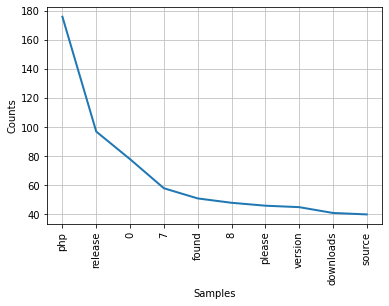

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
counts.plot(10, cumulative=False)


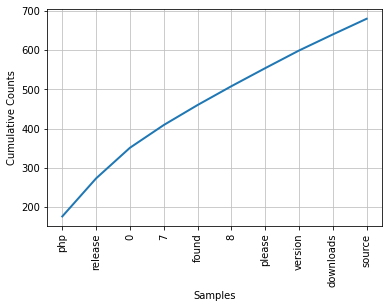

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [21]:
counts.plot(10, cumulative=True)


In [ ]:
ref: https://github.com/speedhot/web_scraping_using_beautifulsoup/blob/master/assignment_beautifulsoup.ipynb